## **3장 신경망 시작하기**

**신경망이 가장 많이 사용되는 세 종류의 문제인 이진 분류, 다중 분류, 스칼라 값을 예측하는 회귀에 배운 것들을 적용한다.**

> - **영화 리뷰를 긍정 또는 부정으로 분류하기(이진 분류)**

> - **신문 기사 토픽으로 분류하기(다중 분류)**

> - **부동산 데이터를 바탕으로 주택가격을 예측하기(회귀)**

## **3.1 신경망의 구조**

**신경망 훈련에는 다음 요소들이 관련**

> - **네트워크(또는 모델)를 구성하는 층: 연속된 층으로 구성된 네트워크가 입력 데이터에 예측으로 매핑한다.**

> - **입력 데이터와 그에 상응하는 타깃**

> - **학습에 사용할 피드백 신호를 정의하는 손실 함수: 손실함수는 예측과 타깃을 비교하여 네트워크의 예측이 기댓값에 얼마나 잘 맞는지 측정하는 손실 값을 만든다.**

> - **학습 진행 방식을 결정하는 옵티마이저: 옵티마이저는 손실 값을 사용하여 네트워크 가중치 업데이트**

![test](./img/네트워크.jpg)

## **3.1.1 층: 딥러닝의 구성 단위**

- **신경망의 핵심적인 데이터 구조는 2장에서 소개한 층이다.**

> - **어떤 종류의 층은 상태가 없지만 대부분의 경우 가중치라는 층의 상태를 가진다.**

> - **가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 지식이 담겨 있다.**

- **층마다 적절한 텐서 포맷과 데이터 처리 방식이 다르다.**

> - **예를 들어 (samples,features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터는 완전 연결층(fully connected layer)이나 밀집 층(dense layer)라 불리는 밀집 연결 층(densely connected layer)에 의해 처리되는 경우가 많다.**

> - **(samples, timesteps, feature) 크기의 3D 텐서로 저장된 시퀸스 데이터는 보통 LSTM같은 순환 층(recurrent layer)에 의해 처리된다.**

> - **4D텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D합성곱 층(convolution layer)에 의해 처리된다.**

- **케라스에서는 호환 가능한 층들을 엮어 데이터 변환 파이프라인(pipeline)을 구성함으로써 딥러닝 모델을 만든다.**

> - **여기에서 층 호환성은  각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환한다는 사실을 말한다.**


### **Keras code**

In [1]:
# 32개의 유닛(=노드)으로 된 밀집층
# 첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층을 만들었다.
# 배치 차원인 0번째 축은 지정하지 않기 때문에 어떤 배치 크기도 입력으로 받을 수 있다.
from keras import layers

layer = layers.Dense(32, input_shape = (784,)) 

Using TensorFlow backend.


**따라서 이 층에는 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 한다.**

> - **케라스에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞추어 주기 때문에 호환성을 걱정하지 않아도 된다.**

In [2]:
from keras import models

model = models.Sequential()
#첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층 -> 첫번 째 차원의 크기가 32로 변환된 텐서를 출력
model.add(layers.Dense(32,input_shape=(784,))) 
#두 번째 층에는 input_shape 매개변수를 지정하지 않았지만 그 대신 앞선 층의 출력 크기(32)를 입력의 크기로 자동으로 채택
model.add(layers.Dense(10))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## **3.1.2 모델: 층의 네트워크**

**딥러닝 모델은 층으로 만든 비순환 유향 그래프(Directed Acyclic Graph, DAG)이다. 가장 일반적인 예가 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓는 것이다.**

> - **그래프 이론에서 비순환 유형 그래프는 에지(edge)에 방향이 있고 한 노드(node)에서 다시 자기 자신으로 돌아올 경로가 없는 그래프를 말한다.**

**다양한 네트워크 구조들을 보게 될 것인데, 자주 등장하는 것들은 다음과 같다.**

> - **가지가 2개인 네트워크**

> - **출력이 여러 개인 네트워크**

> - **인셉션 블록**

**네트워크 구조는 가설 공간(hyothesis space)을 정의한다.**

> - **네트워크 구조를 선택함으로써 가능성 있는 공간(가설공간)을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한하게 된다.**

> - **우리가 찾아야 할 것은 이런 텐서 연산에 포함된 가중치 텐서의 좋은 값이다.**

**신뢰할 만한 모범적인 사례와 원칙이 있지만 연습을 해야만 적절한 신경망을 설계할 수 있는 기술을 갖추게 될 것이다.**

## **3.1.3 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠**

**네트워크 구조를 정의하고 나면 두 가지를 더 선택해야한다.**

> - **손실 함수: 훈련하는 동안 최소화될 값이다. 주어진 문제에 대한 성공 지표가 된다.**

> - **옵티마이저: 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정한다. 특정 종류의 확률적 경사 하강법(SGD)을 구현**

**여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있다. 하지만 경사 하강법 과정은 하나의 스칼라 손실값을 기준으로 한다.**

> - **따라서 손실이 여러 개인 네트워크에서는 모든 손실이 (평균을 내서) 하나의 스칼라 양으로 합쳐진다.**

**문제에 맞는 올바른 목적 함수를 선택하는 것은 아주 중요하다.**

> - **우리가 만든 모든 신경망은 단지 손실 함수를 최소화하기만 한다는 것을 기억**

**올바른 손실 함수를 선택하는 간단한 지침**

> - **2개의 클래스가 있는 분류 문제에는 이진 크로스엔트로피(binary cross_entropy)**

> - **여러 개의 클래스가 있는 분류 문제에는 범주형 크로스엔트로피(categorical cross_entropy)**

> - **회귀 문제에는 평균 제곱 오차(Mean square error)**

> - **시퀸스 학습 문제에는 CTC(Connection Temporal Classification)등을 사용**


## **3.2 케라스 소개**

**케라스는 거의 모든 종류의 딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬을 위한 딥러닝 프레임워크이다.**

> - **동일한 코드로 CPU와 GPU에서 실행할 수 있다.**

> - **사용하기 쉬운 API를 가지고 있어 딥러닝 모델의 프로토타입을 빠르게 만들 수 있다.**

> - **(컴퓨터 비전을 위한)합성곱 신경망, (시퀀스 처리를 위한)순환 신경망을 지원하며 이 둘을 자유롭게 조합하여 사용할 수 있다.**

> - **다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있다. 이 말은 적대적 생성 신경망(Generative Adversarial Network, GAN)부터 뉴럴 튜링 머신(Neural Turing Machine)까지 케라스는 기본적으로 어떤 딥러닝 모델에도 적합하다는 뜻이다.**

**케라스는 MIT 라이센스를 따르므로 상업적인 프로젝트에도 자유롭게 사용할 수 있다.**

**머신 러닝 경연 웹사이트인 캐글(Kaggle)에서도 케라스의 인기가 높다. 최근에 거의 모든 딥러닝 경연 대회의 우승자들이 케라스 모델을 사용하고 있다.**

### **3.2.1 케라스, 텐서플로, 씨아노, CNTK**

![test](./img/스택.png)

**케라스는 딥러닝 모델을 만들기 위한 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리이다. 텐서 조작이나 미분 같은 저수준의 연산을 다루지 않는다. 그 대신 케라스의 백엔드 엔진(backend engine)에서 제공하는 최적화되고 특화된 텐서 라이브러리를 사용한다.**

> - **텐서조작이나 미분 같은 저수준의 연산을 다루지 않는다.**

**그 대신 케라스의 백엔트 엔진(backend engine)에서 제공하는 최적화되고 특화된 텐서 라이브러리를 사용한다.**

> - **텐서플로우의 저수준 API는 처음에는 조금 번거로울 수 있지만 복잡한 모델을 개발할 수 있도록 자유도를 높여준다.**

> - **1.14이상 부터는 tf.keras를 통해 고수준의 API를 사용가능**

**케라스로 작성한 모든 코드는 아무런 변경 없이 이런 백엔드 중 하나를 선택하여 실행**

> - **대부분의 딥러닝 작업에서 텐서플로우 백엔트가 기본적으로 권장(확장성 때문)**

## **3.2.2 케라스를 사용한 개발: 빠르게 둘러보기**

**전형적인 케라스 작업 흐름**

> **1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의**

> **2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의한다.**

> **3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정한다.**

> **4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출**

**모델을 정의하는 방법은 두 가지인데, Sequential 클래스(가장 자주 사용하는 구조인 층을 순서대로 쌓아 올리 네트워크) 또는 함수형 API(완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프)를 사용한다.**

### **Keras code**

In [3]:
# model definition

from keras import models
from keras import layers
from keras import optimizers

# Sequential: 모델 정의 단계
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

# complie: 학습 과정이 설정된다. 여기에서 모델이 사용할 옵티마이저와 손실 함수, 훈련하는 동안 모니터링하기 위해 필요한 측정지표
model.compile(optimizer=optimizers.RMSprop(lr=0.001), # RMSprop optimizer
              loss = 'mse', # loss function
              metrics=['accuracy']) # accuracy

# fit: 입력 데이터의 넘파이 배열을 (그리고 이에 상응하는 타깃 데이터를) 모델의 fit() 메서드에 전달함으로써 학습 과정이 이루어진다.
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## **3.3 딥러닝 컴퓨터 셋팅**

**딥러닝 애플리케이션 개발을 시작하기 전에 먼저 컴퓨터를 셋팅해야 한다. 아주 필수적이지는 않지만 최신 NVIDIA GPU에서 딥러닝 코드를 실행하는 것을 권장한다.**

> - **특히 합성곱 신경망을 사용한 이미지 처리나 순환 신경망을 사용한 시퀀스 처리 같은 일부 애플리케이션을 GPU에서 실행하면 아주 빠른 멀티코어 CPU라도 매우 오래 걸린다.**

> - **최신 GPU를 사용하면 보통 2배나 5배 또는 10배 정도 속도가 빨라진다.**

**컴퓨터에 GPU 카드를 설치하고 싶지 않다면 대안으로 AWS같은 클라우드 플랫폼을 고려해 볼 수 있다. 하지만 시간에 따라 비용이 과금된다.**

## **3.4 영화 리뷰 분류: 이진 분류 예제**

**인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개로 이루어진 IMDB 데이터셋을 사용**

> **이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있다.**

**훈련 데이터와 테스트 데이터를 나누는 이유**

> **같은 데이터에서 머신 러닝 모델을 훈련하고 테스트해서는 절대 안 된다. 모델이 훈련 데이터에서 잘 작동한다는 것이 처음 만난 데이터에서도 잘 작동한다는 것을 보장하지 않는다. 중요한 것은 새로운 데이터에 대한 모델의 성능이다.**

**IMDB 데이터셋도 케라스에 포함되어 있는데 이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있다. 여기서 각 숫자는 사전에 있는 고유한 단어를 나타낸다.**

In [4]:
from keras.datasets import imdb

In [5]:
# num_words = 10000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미이다
# 즉, 드물게 나타나는 단어는 무시하겠다는 의미
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [6]:
# 가장 자주 등장하는 단어 1만 개로 제한했기 때문에 인덱스는 9,999를 넘지 않는다.
max([max(sequence) for sequence in train_data])

9999

In [7]:
# 리뷰 데이터 하나를 원래 영어 단어로 변환
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 

# 정수 인덱스와 단어를 매핑하도록 뒤집는다.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# 리뷰를 디코딩한다. 0,1,2는 '패딩','문서시작','사전에 없음'을 위한 인덱스이므로 3을 뺸다.
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **3.4.2 데이터 준비**

**신경망에 숫자 리스트를 주입할 수는 없으므로, 리스트를 텐서로 바꿔야한다.**

> - **같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다.(가장 긴 리뷰는 2,494개의 단어로 이루어져 있으므로 훈련 데이터를 변환한 텐서의 크기는 (25,000,2494)가 된다.) 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다.(embedding 층을 말하며, 나중에 자세히 다룬다.)**

> - **리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환한다. 예를 들어 시퀀스 [3,5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환한다.(리스트가 하나의 벡터로 변환되므로 훈련 데이터를 변환한 텐서의 크기는 (25,000,10,000)이 된다.) 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용한다.**

In [8]:
import numpy as np

In [9]:
# 크기가 (len(sequences),dimension)인 0행렬을 생성
def vectorize_sequence(sequences,dimension=10000): # 문자 sequence와 차원을 입력으로 받는다.
    results = np.zeros((len(sequences),dimension)) # (25000,10000) 크기의 zero vector를 생성
    for i, sequences in enumerate(sequences): # 각각의 단어를 인덱스와 단어 형태로 분리
        results[i,sequences] = 1. # 현재 result는 0행렬로 이루어져 있음으로, result[i]에서 특정 인덱스(각 리뷰 단어의 해당 위치)의 위치를 1로 만든다. 
    return results

In [10]:
# 훈련, 테스트 데이터를 벡터로 변환한다.
x_train = vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)

print('훈련 데이터의 첫번째 리뷰:',x_train[0])

훈련 데이터의 첫번째 리뷰: [0. 1. 1. ... 0. 0. 0.]


In [11]:
# 리스트 -> 배열(float32)
y_train = np.asarray(train_label).astype('float32') 
y_test = np.asarray(test_label).astype('float32') 

## **3.4.3 신경망 모델 만들기**

**입력 데이터가 벡터고 레이블은 스칼라(1또는 0)이다. 앞으로 볼 수 있는 문제 중 가장 간단한 예**

> - **이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결 층(즉 Dense(16,activation='relu'))을 그냥 쌓은 것이다.**

**Dense층에 전달한 매개변수(16)는 은닉 유닛(hidden unit)의 개수이다. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다.**

> - **16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension,16)이라는 뜻이다.**

> - **따라서 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영된다. 그리고 편향벡터 b를 더하고 relu 연산을 적용한다.**

**표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있다.**

> - **은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴으로 학습 할 수 있다.**

> - **즉, 훈련 데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴**

**Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요**

> - **얼마나 많은 층을 사용할 것인가? (여기선 16개의 은닉 유닛과 2개의 은닉층)**

> - **각 층에 얼마나 많은 은닉 유닛을 둘 것인가? (현재 리뷰의 감정을 스칼라 값을 예측으로 출력하는 세 번째 층)**

**중간에 있는 은닉 층은 활성화 함수로 relu를 사용하고 마지막 층은 확률(0과 1사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미한다.**

> - **출력을 위해 시그모이드 활성화 함수를 사용 (임의의 값을 0~1 사이로 압축하므로 출력 값을 확률처럼 사용)**

>  ![test](./img/시그모이드드.png)

> - **relu는 음수를 0으로 만드는 함수이다.**

>  ![test](./img/렐루.jpg)


In [12]:
from keras import models
from keras import layers

In [13]:
model = models.Sequential() # model 생성
# 입력을 10,000을 받는 16개의 은닉노드 생성 활성화 함수를 relu (1층)
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) 
# 입력을 16을 받는 16개의 은닉노드 생성 활성화 함수는 relu(2층)
model.add(layers.Dense(16,activation='relu'))
# 출력층으로 1개의 값으로 출력 활성화함수는 시그모이드 함수로 0 ~ 1사이의 값(확률)
model.add(layers.Dense(1,activation='sigmoid'))

**활성화 함수를 사용하는 이유**

> - **relu와 같은 활성화 함수(또는 비선형 함수라고도 부른다)가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성된다. (output = dot(W,input)+b**

> - **그러므로 이층은 입력에 대한 선형 변환(아핀 변환)만을 학습할 수 있다. 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변화의 집합이다. 이런 가설 공간은 매우 제약이 많으며, 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없다. 즉, 층을 추가해도 가서 공간이 확장되지 않는다.**

> - **따라서 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 한다. relu는 딥러닝에서 가장 인기 있는 활성화 함수이다.**

**마지막으로 손실 함수와 옵티마이저를 선택해야한다.**

> - **이진 분류 문제고 신경망의 출력이 확률이기 때문에 binary_crossentropy 손실이 적합하다. (mean_squared_error도 사용가능)**

> - **확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택이다.** 

> - **크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정한다. 여기에서는 원본 분포와 예측 분포 사이를 측정**

In [14]:
# rmsprop 옵티마이저와 binary_crossentropy 손실 함수로 모델을 설정하는 단계
# 케라스에 rmsprop, binary_crossentropy, accuracy가 포함되어 있기 때문에,
# 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능하다.
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# 이따금 옵티마이저의 매개변수를 바꾸거나 자시만의 손실 함수, 측정 함수를 전달해야 할 경우가 있다.
# 아래 코드와 같이 옵티마이저 파이썬 클래스를 사용해서 객체를 직접 만들어 optimizer 매개변수에 전달하면 된다.
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [16]:
# 아래의 코드는 loss와 metircs 매개변수에 함수 객체를 전달하면 된다.
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

## **3.4.4 훈련 검증**

**훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어야 한다.**

In [17]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
partial_x_train.shape

(15000, 10000)

**모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킨다. (x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복)**

**동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 측정할 것이다. 이렇게 하려면 validation_data 매개변수에 검증 데이터를 전달해야한다.**

**model.fit() 메서드는 History 객체를 반환한다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있다.**

In [19]:
# 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킨다. (x_train, y_train 텐서에 있는 모든 샘플에 대해 20번 반복)
# 동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 측정할 것이다.
# 이렇게 하려면 validation_data 매개변수에 검증 데이터를 전달해야 한다.

# max_iter = batch_size * iteration -> max_iter = 512 * iteration (1 epch을 위해 반복해야하는 iteration)
# epoch = max_iter / x_train_size -> 20 = max_iter / 15,000
# max_iter = 20 * 15,000  = 300,000 / 즉, 학습에 사진 300,000장을 사용하기로 했기 때문에 15,000장의 사진이 여러번 재사용
# iteration = 약 585번
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data= (x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.5202 - acc: 0.7801 - val_loss: 0.3968 - val_acc: 0.8620
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.3109 - acc: 0.9004 - val_loss: 0.3261 - val_acc: 0.8725
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2294 - acc: 0.9239 - val_loss: 0.2771 - val_acc: 0.8936
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1784 - acc: 0.9435 - val_loss: 0.2855 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1470 - acc: 0.9526 - val_loss: 0.2774 - val_acc: 0.8897
Epoch 6/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1201 - acc: 0.9630 - val_loss: 0.2986 - val_acc: 0.8846
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1016 - acc: 0.9693 - val_loss: 0.3053 - val_a

In [20]:
# model.fit() 메서드는 History 객체를 반환한다.
# 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있다.
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

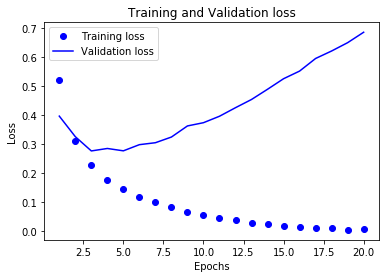

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss'] # history의 loss 값을 loss 변수에 할당
val_loss = history_dict['val_loss'] # history의 val_loss 값을 val_loss변수에 할당

epochs = range(1,len(loss)+1) # 1 ~ 20 정렬

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

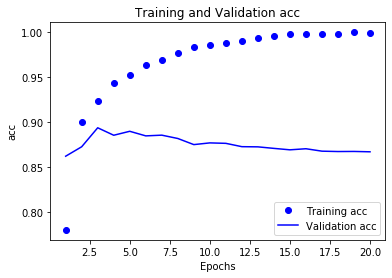

In [22]:
plt.clf() # 그래프를 초기화

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

**결과를 보면 훈련 데이터는 epochs을 반복할수록 정확도는 오르고 손실함수는 낮아지고 있는 경향을 보이지만 validation셋으로 검증한 결과는 반대로 epochs을 반복 할수록 정확도는 낮아지고 손실함수는 높아지는 경향을 보인다. 이를 과대적합(overfiting)이라 한다.**

> - **즉, 두 번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못한다.**

**이런 경우에 과대적합을 방지하기 위해서 세 번째 에포크 이후에 훈련을 중지할 수 있다.**

In [23]:
# 처음부터 다시 새로운 신경망을 네 번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해본다.

model = models.Sequential() # model 생성
# 입력을 10,000을 받는 16개의 은닉노드 생성 활성화 함수를 relu (1층)
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) 
# 입력을 16을 받는 16개의 은닉노드 생성 활성화 함수는 relu(2층)
model.add(layers.Dense(16,activation='relu'))
# 출력층으로 1개의 값으로 출력 활성화함수는 시그모이드 함수로 0 ~ 1사이의 값(확률)
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
print('------------------------------------------------------------------------------------------------------')
results = model.evaluate(x_test,y_test)
print(results) # loss, acc

Epoch 1/4
25000/25000 [==============================] - 2s 60us/step - loss: 0.4431 - acc: 0.8275
Epoch 2/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.2562 - acc: 0.9117
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1989 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.1673 - acc: 0.9409
------------------------------------------------------------------------------------------------------
25000/25000 [==============================] - 2s 90us/step
[0.2914175025320053, 0.884880006313324]


## **3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기** 

**모델을 훈련시킨 후 이를 실전 환경에서 사용하고 싶을 것이다. predict메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있다.**

**아래 결과를 보면 어떤 샘플에 대해 확신을 가지고 있지만 어떤 샘플에 대해서는 확신이 부족한 것을 볼 수 있다.**

In [24]:
model.predict(x_test)

array([[0.19276223],
       [0.9997429 ],
       [0.89531296],
       ...,
       [0.12648672],
       [0.07673863],
       [0.70000255]], dtype=float32)

## **3.4.6 추가 실험**

> - 3개의 은닉 층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인

> - 층의 은닉 유닛을 추가 32개의 유닉

> - mse를 손실함수로 사용

> - relu 대신에 tanh 활성화 함수를 사용

In [25]:
model = models.Sequential() # model 생성
# 입력을 10,000을 받는 32개의 은닉노드 생성 활성화 함수를 tanh (1층)
model.add(layers.Dense(32,activation='tanh',input_shape=(10000,))) 
# 입력을 32을 받는 64개의 은닉노드 생성 활성화 함수는 tanh(2층)
model.add(layers.Dense(64,activation='tanh'))
# 입력을 32을 받는 개의 은닉노드 생성 활성화 함수는 tanh(3층)
model.add(layers.Dense(32,activation='tanh'))
# 출력층으로 1개의 값으로 출력 활성화함수는 시그모이드 함수로 0 ~ 1사이의 값(확률)
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data= (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1534 - acc: 0.7784 - val_loss: 0.0893 - val_acc: 0.8827
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0683 - acc: 0.9108 - val_loss: 0.1096 - val_acc: 0.8533
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0486 - acc: 0.9375 - val_loss: 0.0895 - val_acc: 0.8821
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0422 - acc: 0.9471 - val_loss: 0.0929 - val_acc: 0.8794
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0321 - acc: 0.9596 - val_loss: 0.1064 - val_acc: 0.8683
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0261 - acc: 0.9689 - val_loss: 0.1135 - val_acc: 0.8624
Epoch 7/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0204 - acc: 0.9765 - val_loss: 0.1039 - val_acc

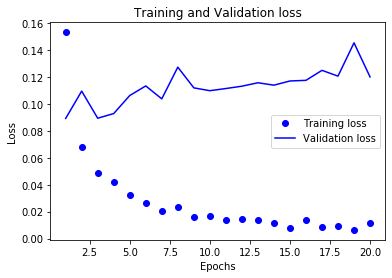

In [27]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

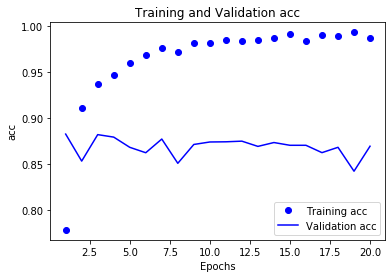

In [28]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [29]:
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 3,
                   batch_size = 512)

Epoch 1/3
15000/15000 [==============================] - 1s 63us/step - loss: 0.0142 - acc: 0.9845
Epoch 2/3
15000/15000 [==============================] - 1s 57us/step - loss: 0.0080 - acc: 0.9915
Epoch 3/3
15000/15000 [==============================] - 1s 58us/step - loss: 0.0115 - acc: 0.9873


In [30]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 87us/step


In [31]:
results

[0.13587923765533372, 0.8522400259971619]

In [32]:
model.predict(x_test)

array([[8.3023310e-04],
       [9.9992001e-01],
       [9.9987996e-01],
       ...,
       [5.1584840e-04],
       [7.7226758e-04],
       [9.9364007e-01]], dtype=float32)

## **3.4.7 정리**

> - **원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요하다. 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있다.**

> - **relu 활성화 함수와 함께 Dense층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 앞으로도 자주 사용**

> - **(출력 클래스가 2개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를가진 Dense층으로 끝나야 한다. 이 신경망의 출력은 확률을 나타내는 0과 1사이의 스칼라 값이다.**

> - **이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy이다.**

> - **rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택이다. 걱정할 거리가 하나 줄은 셈**

> - **훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 된다. 항상 훈련 세트 이외의 데이터에서 성능을 모니터링 해야한다.**

## **3.5 뉴스 기사 분류: 다중 분류 문제**

**2개 이상의 클래스를 분류해야하는 경우는 어떻게 해야 할까?**

**로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 본다.**

> - **클래스가 많기 때문에 이 문제는 다중 분류(multiclass classification)의 예이다.**

> - **각 데이터 포인트가 정확히 하나의 범주로 분류되기 때문에 좀 더 정확히 말하면 단일 레이블 다중 분류(single-label, multiclass classification)이다.**

> - **각 데이터 포인트가 여러 개의 범주에 속할 수 있다면 이것은 다중 레이블 다중 분류(multi-label, multiclass classification) 문제가 된다.**

### **3.5.1 로이터 데이터셋**

**1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용한다.**

> - **이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋이다.**

> - **46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.**

In [33]:
from keras.datasets import reuters

(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

In [34]:
print(len(train_data)) # 8982개의 훈련샘플
print(len(test_data)) # 2246개의 테스트 샘플

8982
2246


In [35]:
# train_data[10] #각 샘플은 정수 리스트이다.(단어 인덱스)

In [36]:
# 단어 decoding
word_index = reuters.get_word_index() 
# word_index에 있는 key와 value를 reverse하여 딕셔너리 형태로 변수에 할당
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# train_data의 첫 번째 리뷰를 key -> value로 변환된 결과를 decoded_newswire에 할당
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_newswire)
print(train_labels[0])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


### **3.5.2 데이터 준비**

**이전의 예제와 동일한 코드를 사용해서 데이터를 벡터로 변환한다.**

In [37]:
import numpy as np

In [38]:
def vectorize_sequences(sequences,dimension = 10000): # data_size, 자주 출현하는 단어 10000
    results = np.zeros((len(sequences),dimension)) # 동일한 크기의 0행렬
    for i, sequences in enumerate(sequences): # 각 단어 별 인덱스 부여
        results[i,sequences] = 1. # 각 데이터 마다 해당 단어의 인덱스 위치에 1을 추가
    return results

In [39]:
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

**레이블을 벡터로 바꾸는 방법은 두 가지이다.**

> - **레이블의 리스트를 정수 텐서로 변환하는 것**

> - **원-핫 인코딩을 사용하는 것 (원-핫 인코딩이 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고도 부른다.)**

In [40]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension)) # data_size(label), 46개의 토픽
    for i, label in enumerate(labels): # 각 레이블에 인덱스를 할당하고, labels의 값들을 label에 할당
        results[i,label]= 1. # 즉, 첫 번째 labels이라면 result[0,3] -> 첫 번재 리뷰는 3번째 토픽을 의미
    return results

In [41]:
one_hot_train_label = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_label = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [42]:
one_hot_train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**MNIST 예제에서 이미 보았듯이 케라스에는 이를 위한 내장 함수가 있다.**

In [43]:
from keras.utils.np_utils import to_categorical

In [44]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### **3.5.3 모델 구성**

**이 토픽 분류 문제는 이전의 영화 리뷰 분류 문제와 비슷해 보인다. 두 경우 모두 짧은 텍스트를 분류하는 것이다. 하지만 이 예제에서는 출력 클래스의 개수가 2에서 46개로 늘어난 점이다.**

> - **즉, 출력 공간의 차원이 훨씬 커졌다.**

**이전에 사용했던 것처럼 Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다. 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 이를 복원할 방법이 없다.** 

> - **각 층은 잠재적으로 정보의 병목이 될 수 있다.**

> - **이전 예제에서 16차원을 가진 중간층을 사용했지만 16차원 공간은 46개의 클래스를 구분하기에 너무 제약이 많다.**

> - **따라서 16차원의 공간은 46개의 클래스를 구분하기에 너무 제약이 많으므로 은닉 유닛을 64개로 늘린다.**

In [45]:
from keras import models
from keras import layers

In [46]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

**이 구조에서 주목해야 할 점**

> - **마지막 Dense 층의 크기가 46이다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻이다. 이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩된 것이다.**

> - **마지막 층에 softmax 활성화 함수가 사용되었다. 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력한다. 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률이다. 46개의 값을 모두 더하면 1이 된다.**

**이런 문제에 사용할 최선의 손실 함수는 categorical_crossentropy이다. 이 함수는 두 확률 분포 사이의 거리를 측정한다. 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리이다. 두 분포사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 된다.**

In [47]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

### **3.5.4 훈련 검증**

**훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용한다.**

In [48]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [49]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 89us/step - loss: 2.6946 - accuracy: 0.5083 - val_loss: 1.7783 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.4445 - accuracy: 0.7112 - val_loss: 1.3306 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.0758 - accuracy: 0.7740 - val_loss: 1.1458 - val_accuracy: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.8486 - accuracy: 0.8230 - val_loss: 1.0435 - val_accuracy: 0.7970
Epoch 5/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.6773 - accuracy: 0.8592 - val_loss: 0.9723 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.5455 - accuracy: 0.8855 - val_loss: 0.9782 - val_accuracy: 0.7840
Epoch 7/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.439

In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

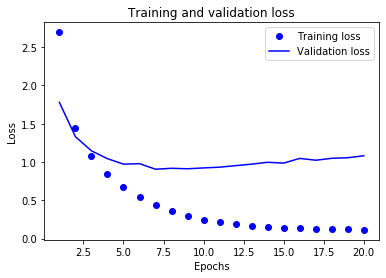

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1) #범위 1 ~ 21

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

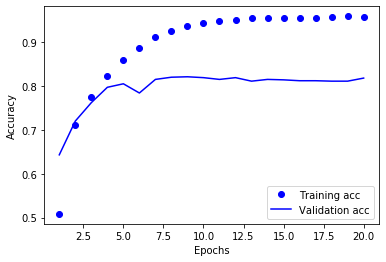

In [52]:
plt.clf() # 그래프를 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
# 이 모델은 아홉 번째 에포크 이후에 과대적합이 시작된다. 아홉 번 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가한다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [54]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [55]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 80us/step - loss: 2.5762 - accuracy: 0.5440 - val_loss: 1.6839 - val_accuracy: 0.6590
Epoch 2/9
7982/7982 [==============================] - 1s 67us/step - loss: 1.3662 - accuracy: 0.7159 - val_loss: 1.2635 - val_accuracy: 0.7390
Epoch 3/9
7982/7982 [==============================] - 1s 65us/step - loss: 1.0118 - accuracy: 0.7840 - val_loss: 1.1317 - val_accuracy: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 66us/step - loss: 0.7920 - accuracy: 0.8317 - val_loss: 1.0299 - val_accuracy: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.6285 - accuracy: 0.8675 - val_loss: 0.9576 - val_accuracy: 0.8100
Epoch 6/9
7982/7982 [==============================] - 1s 66us/step - loss: 0.5051 - accuracy: 0.8949 - val_loss: 0.9326 - val_accuracy: 0.8170
Epoch 7/9
7982/7982 [==============================] - 1s 66us/step - loss: 0.4043 - acc

In [56]:
result = model.evaluate(x_test,one_hot_test_labels)
result

2246/2246 [==============================] - 0s 107us/step


[1.0020089924388556, 0.7862867116928101]

### **3.5.5 새로운 데이터에 대해 예측하기**

**모델 객체의 predict 메서드는 46개의 토픽에 대한 확률 분포를 반환한다.**

In [57]:
predictions = model.predict(x_test)
predictions

array([[1.43038560e-05, 1.29849550e-05, 1.14431236e-06, ...,
        2.77593244e-06, 2.26174461e-06, 1.20275272e-05],
       [1.47458690e-04, 6.37981202e-03, 2.93934045e-05, ...,
        3.83477280e-04, 7.22020177e-09, 5.23806136e-07],
       [5.63030830e-04, 7.55641401e-01, 3.94312898e-03, ...,
        6.60336297e-03, 9.24273118e-05, 8.95887497e-05],
       ...,
       [2.01863095e-05, 9.93212743e-05, 2.44912153e-05, ...,
        1.24512235e-05, 7.13964982e-06, 3.59208098e-05],
       [2.83270888e-03, 4.98439632e-02, 2.53909896e-03, ...,
        2.14425358e-03, 6.80453319e-04, 1.92333129e-03],
       [6.18123391e-04, 2.60398775e-01, 1.45302033e-02, ...,
        7.46783242e-03, 1.91061219e-04, 1.28193918e-04]], dtype=float32)

In [58]:
print(predictions[0].shape) # 각 항목은 길이가 46인 벡터
print(np.sum(predictions[0])) # 이 벡터의 원소의 합은 1이다.
print(np.argmax(predictions[0])) # 가장 큰 값이 예측 클래스가 된다.

(46,)
1.0000001
3


### **3.5.6 레이블과 손실을 다루는 다른 방법**

**앞서 언급한 것처럼 레이블을 인코딩하는 다른 방법은 다음과 같이 정수 텐서로 변환하는 것이다.**

> **이 방식을 사용하려면 categorical_crossentropy -> sparse_categorical_crossentropy로 손실 함수 하나만 바꾸면 된다.**

**이 손실 함수는 인터페이스만 다를 뿐이고 수학적으로는 categorical_crossentropy와 동일하다.**

In [59]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [60]:
print(train_labels)
print(y_train)

[ 3  4  3 ... 25  3 25]
[ 3  4  3 ... 25  3 25]


In [61]:
model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### **3.5.7 충분히 큰 중간층을 두어야 하는 이유**

**마지막 출력이 46차원이기 때문에 충간층의 히든 유닛이 46개보다 많이 적어서는 안 된다. 46차원보다 훨씬 작은 중간층을 두면 정보의 병목이 어떻게 나타나는지 확인해 본다.**

In [62]:
model = models.Sequential()

In [63]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [64]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [65]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 96us/step - loss: 2.6589 - accuracy: 0.3262 - val_loss: 1.9298 - val_accuracy: 0.5800
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.6437 - accuracy: 0.6232 - val_loss: 1.5258 - val_accuracy: 0.6490
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.3412 - accuracy: 0.6768 - val_loss: 1.4059 - val_accuracy: 0.6630
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.1829 - accuracy: 0.6978 - val_loss: 1.3380 - val_accuracy: 0.6750
Epoch 5/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.0629 - accuracy: 0.7296 - val_loss: 1.3157 - val_accuracy: 0.6910
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.9659 - accuracy: 0.7549 - val_loss: 1.2723 - val_accuracy: 0.7060
Epoch 7/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.889

In [66]:
result = model.evaluate(x_test,one_hot_test_labels)
result

2246/2246 [==============================] - 0s 95us/step


[2.0230983711201915, 0.6963490843772888]

**검증 정확도의 최고 값은 약 72%로 7% 정도 감소되었다. 이러한 손실의 원인 대부분은 많은 정보(클래스 46개의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다.**

**이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했다.**

## **3.5.8 추가 실험**

> - **더 크거나 작은 층을 사용해 보자. 32개의 유닛, 128개의 유닛 등**

> - **여기에서 2개의 은닉 층을 사용했다. 1개나 3개의 은닉 층을 사용해보자**

In [67]:
model = models.Sequential()

model.add(layers.Dense(64, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(46, activation='softmax'))

In [68]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [69]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.7088 - accuracy: 0.6131 - val_loss: 1.2612 - val_accuracy: 0.7020
Epoch 2/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.9871 - accuracy: 0.7658 - val_loss: 1.0717 - val_accuracy: 0.7630
Epoch 3/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.6703 - accuracy: 0.8380 - val_loss: 1.0098 - val_accuracy: 0.7870
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.4617 - accuracy: 0.8906 - val_loss: 1.0419 - val_accuracy: 0.7980
Epoch 5/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.3220 - accuracy: 0.9251 - val_loss: 1.3102 - val_accuracy: 0.7270
Epoch 6/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.2441 - accuracy: 0.9412 - val_loss: 1.4067 - val_accuracy: 0.7610
Epoch 7/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.20

In [70]:
result = model.evaluate(x_test,one_hot_test_labels)
result

2246/2246 [==============================] - 0s 97us/step


[2.4443609143407454, 0.7729296684265137]

## **3.5.9 정리**

> - **N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense층의 크기는 N이어야 한다.**

> - **단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 한다.**

> - **이런 문제에는 항상 범주형 크로스엔트로피를 사용. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화한다.**

> - **다중 분류에서 레이블을 다루는 두 가지 방법이 존재한다. (원-핫인코딩, 정수인코딩)**

> - **많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 주의**

## **3.6 주택 가격 예측: 회귀 문제**

**또 다른 종류의 머신 러닝 문제는 개별적인 레이블 대신 연속적인 값을 예측하는 회귀(regression)이다.**

> **예를 들어 기상 데이터가 주어졌을 때 내일 기온을 예측하거나, 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측**

### **3.6.1 보스턴 주택 가격 데이터셋**

**1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측한다.**

> **데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로, 102개의 테스트 샘플로 나뉘어져 있다. 입력 데이터에 있는 각 특성(feature)은 스케일이 서로 다르다.**

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_target) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
# 여기서 볼 수 있듯이 404개의 훈련 샘플과 102개의 테스트 샘플이 있고 모두 13개의 수치 특성이 있다.
# 이 특성들은 1인당 범죄율, 주택당 평균 방의 개수, 고속도로 접근성 등이다.
print('훈련 데이터의 shape:',train_data.shape) # 훈련 데이터 shape
print('테스트 데이터의 shape:',test_data.shape) # 테스트 데이터 shape
# 이 가격은 일반적으로 1만 달러에서 5만 달러 사이다.
print('훈련 데이터의 상위 10개 label:',train_targets[:10]) # label (상위 10개만 추출)

훈련 데이터의 shape: (404, 13)
테스트 데이터의 shape: (102, 13)
훈련 데이터의 상위 10개 label: [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


### **3.6.2 데이터 준비**

**상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다. 네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실히 학습을 더 어렵게 많든다.**

**이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것이다. 입력 데이터에 있는 각 특성에 대해서 특성의 평균을 빼고 표준 편차로 나눈다.**

In [3]:
mean = train_data.mean(axis=0) # 열을 기준으로 평균 
train_data -= mean # 모든 훈련 데이터에 평균을 뺀다.
std = train_data.std(axis=0) # 열을 기준으로 표준편차
train_data /= std # 평균을 뺀 값에서 표준편차로 나눠 줌

In [4]:
# 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주목해야한다. 머신러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 된다.
test_data -= mean
test_data /= std

### **3.6.3 모델 구성**

**샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용한다.**

> **일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법이다.**

In [5]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return model

**이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없다. 이것이 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성이다.**

> - **마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습된다.**

> - **mse는 평균 제곱 오차의 약어로 예측과 타깃 사이 거이의 제곱이다. 회귀 문제에서 널리 사용되는 손실함수 이다.**

> - **훈련하는 동안 모니터링을 위해 새로운 지표인 평균 절대 오차(MAE)를 측정한다. 이는 예측과 타깃 사이 거리의 절댓값이다. 예를들어 이 예제에서 MAE가 0.5이면 예측이 평균적으로 500달러 정도 차이가 난다는 뜻이다.**

### **3.6.4 K-겹 검증을 사용한 훈련 검증**

**매개변수들을 조정하면서 모델을 평가하기 위해 이전 예제에서 했던 것처럼 데이터를 훈련 세트와 검증 세트로 나눈다.**

> - **이 경우 데이터 포인트가 많지 않기 때문에 검증 세트도 매우 작다.**

> - **결국 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라진다. 즉, 검증 세트의 분할에 대한 검증 점수의 분산이 높다. 이렇게 되면 신뢰 있는 모델을 평가하기 어렵다.**

**이런 상황에서 가장 좋은 방법은 K-겹 교차 검증을 사용하는 것이다. 데이터를 K개의 분할(즉, Fold)로 나누고, K개의 모델을 각각 만들어 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법이다.**

> - **모델의 검증 점수는 K개의 검증 점수 평균이 된다.**

In [6]:
import numpy as np

In [7]:
k = 4 # 4-fold
num_val_samples = len(train_data) // k # data셋을 4개로 나눔
num_epochs = 100 # 반복 수
all_scores = [] # MAE를 담을 리스트

In [13]:
for i in range(k): # K-Fold 반복수 
    print('처리중인 폴드 #',i) 
    # validation_set(train) 0: num_val_sample -> num_val_sample: 2*num_val_sample ....
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples] 
    # validation_set(target) 0: num_val_sample -> num_val_sample: 2*num_val_sample
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    # 1num_val_sample: -> :num_val_sample, 2num_val_sample: -> ... 
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]], axis = 0
    )
    # 1num_val_sample: -> :num_val_sample, 2num_val_sample: -> ...
    partial_train_target = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]], axis = 0
    )
    
    model = build_model() # Include keras compile
    model.fit(partial_train_data,partial_train_target,
             epochs = num_epochs, batch_size = 1, verbose = 0 ) 
    # verbos=0 train process print(x)
    
    val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0) # mse, mae
    all_scores.append(val_mae) # val_mae(검증셋 점수 리스트 추가)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [14]:
print('all_score:',all_scores)
print('K-폴드 교차검증의 평균:',np.mean(all_scores))

all_score: [1.9140071868896484, 2.786120653152466, 2.4797942638397217, 2.4682586193084717]
K-폴드 교차검증의 평균: 2.412045180797577


**검증 세트가 다르므로 확실히 검증 검수가 2.1에서 2.9까지 변화가 크다. 평균값(2.4)이 각각의 점수보다 훨씬 신뢰할 만하다. 이것이 K-겹 교차 검증의 핵심이다.**

**위 예제에서는 평균적으로 2400달러 정도 차이가 난다. 주택 가격 범위가 1만 달러에서 5만달러 사이인 것을 감안하면 비교적 큰 값이다.**

In [8]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('처리중인 폴드: {}'.format(i))
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]], axis = 0
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]], axis = 0
    )
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                       validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드: 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 3ms/step - loss: 225.0525 - mae: 11.7886 - val_loss: 35.7250 - val_mae: 3.8943
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 27.4738 - mae: 3.6226 - val_loss: 21.8675 - val_mae: 2.9225
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 19.7625 - mae: 3.0075 - val_loss: 17.8286 - val_mae: 2.9215
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 16.6199 - mae: 2.7729 - val_loss: 14.9752 - val_mae: 2.4392
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 15.5848 - mae: 2.6877 - val_loss: 13.6868 - val_mae: 2.6250
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 13.9183 - mae: 2.4956 - val_loss: 13.3808 - val_mae: 2.2586
Epoch 7/500
303/303 [============================

303/303 [==============================] - 1s 2ms/step - loss: 3.5039 - mae: 1.3085 - val_loss: 9.5537 - val_mae: 2.1973
Epoch 119/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4367 - mae: 1.2332 - val_loss: 10.2108 - val_mae: 2.2553
Epoch 120/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5907 - mae: 1.2740 - val_loss: 9.0203 - val_mae: 2.2081
Epoch 121/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3376 - mae: 1.2359 - val_loss: 8.9944 - val_mae: 2.1299
Epoch 122/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3993 - mae: 1.2412 - val_loss: 8.8602 - val_mae: 2.0948
Epoch 123/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1073 - mae: 1.2156 - val_loss: 9.1914 - val_mae: 2.1229
Epoch 124/500
303/303 [==============================] - 1s 2ms/step - loss: 3.0771 - mae: 1.1634 - val_loss: 8.7153 - val_mae: 2.1743
Epoch 125/500
303/303 [==============================] - 1s 2ms/step

303/303 [==============================] - 1s 2ms/step - loss: 1.3973 - mae: 0.8967 - val_loss: 10.7752 - val_mae: 2.3269
Epoch 239/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5350 - mae: 0.9095 - val_loss: 13.4415 - val_mae: 2.4326
Epoch 240/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5068 - mae: 0.8848 - val_loss: 12.2305 - val_mae: 2.4518
Epoch 241/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4786 - mae: 0.8889 - val_loss: 12.1278 - val_mae: 2.3556
Epoch 242/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4892 - mae: 0.9489 - val_loss: 10.9903 - val_mae: 2.3462
Epoch 243/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5896 - mae: 0.8902 - val_loss: 12.7054 - val_mae: 2.6060
Epoch 244/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3715 - mae: 0.8847 - val_loss: 12.8471 - val_mae: 2.4364
Epoch 245/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.1019 - mae: 0.7531 - val_loss: 13.2222 - val_mae: 2.5345
Epoch 359/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8742 - mae: 0.6904 - val_loss: 13.9966 - val_mae: 2.5353
Epoch 360/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8463 - mae: 0.6956 - val_loss: 13.4847 - val_mae: 2.5893
Epoch 361/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0342 - mae: 0.7139 - val_loss: 12.3444 - val_mae: 2.3592
Epoch 362/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9838 - mae: 0.7297 - val_loss: 13.6160 - val_mae: 2.5674
Epoch 363/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8953 - mae: 0.7024 - val_loss: 13.9057 - val_mae: 2.3638
Epoch 364/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0540 - mae: 0.7218 - val_loss: 14.5924 - val_mae: 2.5701
Epoch 365/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.6558 - mae: 0.6061 - val_loss: 14.1674 - val_mae: 2.6922
Epoch 479/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7765 - mae: 0.6463 - val_loss: 16.6699 - val_mae: 2.7530
Epoch 480/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6621 - mae: 0.6146 - val_loss: 15.8632 - val_mae: 2.7321
Epoch 481/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7314 - mae: 0.6268 - val_loss: 14.2753 - val_mae: 2.6603
Epoch 482/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7955 - mae: 0.6455 - val_loss: 14.1612 - val_mae: 2.5401
Epoch 483/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7608 - mae: 0.6304 - val_loss: 13.9142 - val_mae: 2.6102
Epoch 484/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7698 - mae: 0.6192 - val_loss: 12.7091 - val_mae: 2.5215
Epoch 485/500
303/303 [==============================] - 1s 2m

Epoch 99/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4388 - mae: 1.2476 - val_loss: 12.0640 - val_mae: 2.4474
Epoch 100/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5540 - mae: 1.3324 - val_loss: 13.6711 - val_mae: 2.6233
Epoch 101/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5648 - mae: 1.3374 - val_loss: 21.4129 - val_mae: 3.3407
Epoch 102/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6827 - mae: 1.3148 - val_loss: 16.8491 - val_mae: 2.9555
Epoch 103/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3470 - mae: 1.2365 - val_loss: 11.5883 - val_mae: 2.4363
Epoch 104/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5581 - mae: 1.2618 - val_loss: 12.6364 - val_mae: 2.4358
Epoch 105/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3431 - mae: 1.2496 - val_loss: 14.8024 - val_mae: 2.6639
Epoch 106/500
303/303 [==========================

303/303 [==============================] - 1s 2ms/step - loss: 1.5632 - mae: 0.9546 - val_loss: 24.2063 - val_mae: 3.1938
Epoch 220/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4967 - mae: 0.8907 - val_loss: 21.4065 - val_mae: 3.1251
Epoch 221/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7304 - mae: 0.9472 - val_loss: 18.4146 - val_mae: 2.8710
Epoch 222/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4954 - mae: 0.9187 - val_loss: 19.2847 - val_mae: 2.8633
Epoch 223/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4982 - mae: 0.8673 - val_loss: 19.9004 - val_mae: 2.9483
Epoch 224/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4977 - mae: 0.8916 - val_loss: 20.3308 - val_mae: 2.9945
Epoch 225/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4343 - mae: 0.8762 - val_loss: 19.4718 - val_mae: 2.8523
Epoch 226/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.0671 - mae: 0.7616 - val_loss: 22.9551 - val_mae: 3.2649
Epoch 340/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0761 - mae: 0.7726 - val_loss: 19.0385 - val_mae: 2.8876
Epoch 341/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1107 - mae: 0.7626 - val_loss: 22.6647 - val_mae: 2.9074
Epoch 342/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9931 - mae: 0.7541 - val_loss: 20.7487 - val_mae: 3.0085
Epoch 343/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1407 - mae: 0.8118 - val_loss: 21.7998 - val_mae: 2.8434
Epoch 344/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1619 - mae: 0.7891 - val_loss: 15.9656 - val_mae: 2.6383
Epoch 345/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0774 - mae: 0.7598 - val_loss: 15.9559 - val_mae: 2.7372
Epoch 346/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.8675 - mae: 0.6957 - val_loss: 18.2456 - val_mae: 2.7193
Epoch 460/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7750 - mae: 0.6446 - val_loss: 21.4438 - val_mae: 3.0162
Epoch 461/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0198 - mae: 0.7390 - val_loss: 16.8348 - val_mae: 2.7837
Epoch 462/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8863 - mae: 0.7051 - val_loss: 19.9948 - val_mae: 2.8394
Epoch 463/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8882 - mae: 0.6809 - val_loss: 20.2908 - val_mae: 2.9319
Epoch 464/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8963 - mae: 0.6580 - val_loss: 19.4780 - val_mae: 2.9409
Epoch 465/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7878 - mae: 0.6766 - val_loss: 24.5899 - val_mae: 3.1237
Epoch 466/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 7.6579 - mae: 1.9265 - val_loss: 17.2180 - val_mae: 2.9304
Epoch 20/500
303/303 [==============================] - 1s 2ms/step - loss: 7.4354 - mae: 1.8693 - val_loss: 15.6177 - val_mae: 2.7508
Epoch 21/500
303/303 [==============================] - 1s 2ms/step - loss: 6.9649 - mae: 1.9023 - val_loss: 15.5490 - val_mae: 2.6893
Epoch 22/500
303/303 [==============================] - 1s 2ms/step - loss: 7.3351 - mae: 1.8788 - val_loss: 14.8484 - val_mae: 2.5320
Epoch 23/500
303/303 [==============================] - 1s 2ms/step - loss: 6.6986 - mae: 1.8179 - val_loss: 15.4843 - val_mae: 2.5994
Epoch 24/500
303/303 [==============================] - 1s 2ms/step - loss: 6.7263 - mae: 1.8551 - val_loss: 14.4665 - val_mae: 2.5202
Epoch 25/500
303/303 [==============================] - 1s 2ms/step - loss: 6.7780 - mae: 1.8279 - val_loss: 16.0250 - val_mae: 2.7010
Epoch 26/500
303/303 [==============================] - 1s 2ms/step 

Epoch 80/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6490 - mae: 1.3537 - val_loss: 14.1834 - val_mae: 2.4434
Epoch 81/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3185 - mae: 1.3007 - val_loss: 16.4556 - val_mae: 2.6862
Epoch 82/500
303/303 [==============================] - 1s 2ms/step - loss: 3.2695 - mae: 1.2805 - val_loss: 15.0279 - val_mae: 2.4777
Epoch 83/500
303/303 [==============================] - 1s 2ms/step - loss: 3.2566 - mae: 1.2956 - val_loss: 15.9824 - val_mae: 2.6298
Epoch 84/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1339 - mae: 1.2587 - val_loss: 16.4654 - val_mae: 2.7291
Epoch 85/500
303/303 [==============================] - 1s 2ms/step - loss: 3.2643 - mae: 1.2649 - val_loss: 16.0622 - val_mae: 2.6096
Epoch 86/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1144 - mae: 1.2236 - val_loss: 19.3090 - val_mae: 2.9478
Epoch 87/500
303/303 [==============================] -

303/303 [==============================] - 1s 2ms/step - loss: 1.4334 - mae: 0.8692 - val_loss: 14.2242 - val_mae: 2.5521
Epoch 201/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3803 - mae: 0.8829 - val_loss: 13.8776 - val_mae: 2.6180
Epoch 202/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3957 - mae: 0.8679 - val_loss: 14.0819 - val_mae: 2.5160
Epoch 203/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3873 - mae: 0.8381 - val_loss: 15.0262 - val_mae: 2.6014
Epoch 204/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4922 - mae: 0.9348 - val_loss: 13.4997 - val_mae: 2.6002
Epoch 205/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3789 - mae: 0.8864 - val_loss: 14.5719 - val_mae: 2.5466
Epoch 206/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4730 - mae: 0.8973 - val_loss: 13.0070 - val_mae: 2.5695
Epoch 207/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.8029 - mae: 0.6708 - val_loss: 14.0306 - val_mae: 2.5577
Epoch 321/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8751 - mae: 0.6987 - val_loss: 13.6919 - val_mae: 2.4350
Epoch 322/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9418 - mae: 0.7018 - val_loss: 13.2544 - val_mae: 2.4687
Epoch 323/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0001 - mae: 0.7354 - val_loss: 13.6091 - val_mae: 2.5904
Epoch 324/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8866 - mae: 0.6723 - val_loss: 13.1717 - val_mae: 2.5690
Epoch 325/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8735 - mae: 0.7030 - val_loss: 13.8483 - val_mae: 2.4990
Epoch 326/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9845 - mae: 0.7106 - val_loss: 13.5845 - val_mae: 2.5980
Epoch 327/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.8185 - mae: 0.6896 - val_loss: 12.7410 - val_mae: 2.4699
Epoch 381/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7695 - mae: 0.6510 - val_loss: 13.6735 - val_mae: 2.5276
Epoch 382/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7715 - mae: 0.6396 - val_loss: 12.7471 - val_mae: 2.4088
Epoch 383/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8054 - mae: 0.6867 - val_loss: 13.6893 - val_mae: 2.5571
Epoch 384/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8156 - mae: 0.6539 - val_loss: 13.6390 - val_mae: 2.6067
Epoch 385/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8777 - mae: 0.6923 - val_loss: 12.7746 - val_mae: 2.5302
Epoch 386/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8040 - mae: 0.6587 - val_loss: 13.7181 - val_mae: 2.5376
Epoch 387/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.6563 - mae: 0.6076 - val_loss: 13.5841 - val_mae: 2.5898
처리중인 폴드: 3
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 181.2792 - mae: 10.0099 - val_loss: 71.0099 - val_mae: 5.9144
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 30.6490 - mae: 3.6866 - val_loss: 36.3712 - val_mae: 3.9523
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 20.8679 - mae: 3.0247 - val_loss: 28.9456 - val_mae: 3.4059
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 16.7571 - mae: 2.6854 - val_loss: 24.5942 - val_mae: 3.2426
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 14.9198 - mae: 2.4829 - val_loss: 20.7112 - val_mae: 3.0124
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 13.4612 - mae: 2.3132 - val_loss: 20.0344 - val_mae: 3.1247
Epoch 7/5

303/303 [==============================] - 1s 2ms/step - loss: 3.6105 - mae: 1.2369 - val_loss: 13.7387 - val_mae: 2.7549
Epoch 121/500
303/303 [==============================] - 1s 2ms/step - loss: 3.8481 - mae: 1.2191 - val_loss: 11.7357 - val_mae: 2.4716
Epoch 122/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6910 - mae: 1.2359 - val_loss: 11.8983 - val_mae: 2.5181
Epoch 123/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6171 - mae: 1.1875 - val_loss: 12.9138 - val_mae: 2.6740
Epoch 124/500
303/303 [==============================] - 1s 2ms/step - loss: 3.7982 - mae: 1.2674 - val_loss: 11.7511 - val_mae: 2.6181
Epoch 125/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6894 - mae: 1.2375 - val_loss: 12.8292 - val_mae: 2.6725
Epoch 126/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3367 - mae: 1.1846 - val_loss: 13.4072 - val_mae: 2.6569
Epoch 127/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 2.0412 - mae: 1.0071 - val_loss: 14.0877 - val_mae: 2.6384
Epoch 241/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0469 - mae: 0.9653 - val_loss: 16.0104 - val_mae: 2.9264
Epoch 242/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9079 - mae: 0.9643 - val_loss: 15.8165 - val_mae: 2.8733
Epoch 243/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9281 - mae: 0.9794 - val_loss: 16.2231 - val_mae: 2.8836
Epoch 244/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9243 - mae: 0.9603 - val_loss: 14.1311 - val_mae: 2.6282
Epoch 245/500
303/303 [==============================] - 1s 2ms/step - loss: 1.8394 - mae: 0.9820 - val_loss: 14.5875 - val_mae: 2.7270
Epoch 246/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9790 - mae: 0.9677 - val_loss: 16.3006 - val_mae: 2.9417
Epoch 247/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.3505 - mae: 0.8658 - val_loss: 14.9214 - val_mae: 2.7312
Epoch 361/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3535 - mae: 0.8301 - val_loss: 14.1160 - val_mae: 2.6619
Epoch 362/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1934 - mae: 0.7849 - val_loss: 14.0484 - val_mae: 2.6703
Epoch 363/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2227 - mae: 0.8262 - val_loss: 12.6351 - val_mae: 2.5028
Epoch 364/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2433 - mae: 0.8408 - val_loss: 14.2122 - val_mae: 2.6671
Epoch 365/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2790 - mae: 0.8021 - val_loss: 14.6973 - val_mae: 2.7144
Epoch 366/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1940 - mae: 0.8087 - val_loss: 15.5446 - val_mae: 2.8980
Epoch 367/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.9523 - mae: 0.7192 - val_loss: 16.5990 - val_mae: 3.0115
Epoch 481/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0200 - mae: 0.7354 - val_loss: 15.0559 - val_mae: 2.7292
Epoch 482/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9255 - mae: 0.7250 - val_loss: 15.0290 - val_mae: 2.7438
Epoch 483/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9522 - mae: 0.7050 - val_loss: 14.7123 - val_mae: 2.6920
Epoch 484/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9789 - mae: 0.6918 - val_loss: 14.4818 - val_mae: 2.6892
Epoch 485/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8555 - mae: 0.6637 - val_loss: 14.6096 - val_mae: 2.7258
Epoch 486/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9162 - mae: 0.6980 - val_loss: 16.0498 - val_mae: 2.9381
Epoch 487/500
303/303 [==============================] - 1s 2m

In [9]:
# 모든 폴드에 대해 에포크의 MAE 점수 평균을 계산한다.
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

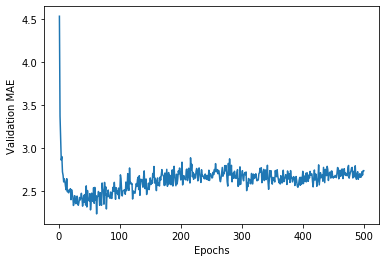

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**이 그래프는 범위가 크고 변동이 심하기 떄문에 보기가 좀 어렵다.**

> **곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외시킨다.**

> **부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균(exponential moving average)으로 대체한다.**

In [12]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

In [13]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

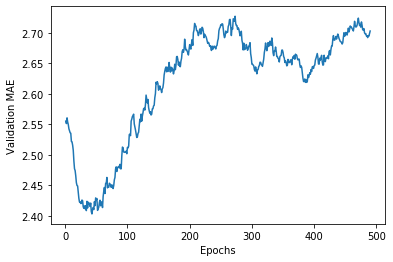

In [14]:
plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**이 그래프를 보면 검증 MAE가 80번째 에포크 이후에 줄어드는 것이 멈추었다. 이 지점 이후로는 과대적합이 시작된다.**

**모델의 여러 매개변수에 대한 튜닝이 끝나면(에포크 수뿐만 아니라 은닉 층의 크기도 조절할 수 있다.)**

In [23]:
model = build_model() # new compile model

In [26]:
model.fit(train_data, train_targets, # total train_set
         epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data,test_target)

test_mae_score # 아직 2,843달러 정도 차이가 난다.

102/102 [==============================] - 0s 49us/step


2.583094596862793

### **3.6.5 정리**

> - **회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용한다. 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수이다.**

> - **비슷하게 회귀에서 사용되는 평가 지표는 분류와 다른다. 당연히 정확도 개념은 회귀에서 적용되지 않는다. 일반적인 회귀 지표는 평균 절대 오차(MAE)이다.**

> - **입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 한다.**

> - **가용한 데이터가 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법이다.**

> - **가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋다.**

## **3.7 요약**

> - **보통 원본 데이터를 신경망에 주입하기 전에 전처리해야 한다.**

> - **데이터의 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정해야 한다.**

> - **훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 새로운 데이터에 대해 나쁜 결과를 얻게 된다.**

> - **훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개 또는 2개의 은닉 층을 가진 신경망을 사용한다.**

> - **데이터가 많은 범주로 나뉘어 있을 때 중간층을 너무 작으면 정보의 병목이 생길 수 있다.**

> - **회귀는 분류와 다른 손실 함수와 평가 지표를 사용한다.**

> - **적은 데이터를 사용할 때는 K-겹 검증이 신뢰할 수 있는 모델 평가를 도와준다.**